In [68]:
#MACROECONIMIC ANALISIS



import os
import pandas as pd
os.getcwd()

os.chdir('C:/Users/luisl/OneDrive/Escritorio/ml-scripts')

In [69]:

# import data

data = pd.read_excel("C:/Users/luisl/OneDrive/Escritorio/ml-scripts//gdp_by_sector.xlsx",header=None) # creates a Pandas data frame for training set



In [70]:

## divide dataset  in 2010 and 2020

#2010
df_2010 = data[[0,1,3,5,7]]

#transpose
df_2010=df_2010.transpose()

df_2010=df_2010.drop([1],axis=1)

#drop innecesary columns by index interval
df_2010=df_2010.drop(df_2010.iloc[:, 223:283], inplace = False, axis = 1)


#first row as index
df_2010=df_2010.rename(columns=df_2010.iloc[0])
#drop row
df_2010=df_2010.drop([0],axis=0)

#FIRST COLUMN AS ROW INDEX
df_2010=df_2010.set_index('SECTOR')

#transpose d enuevo
df_2010=df_2010.transpose()


#2020

df_2020 = data[[0,2,4,6,8]]
#transpose
df_2020=df_2020.transpose()

df_2020=df_2020.drop([1],axis=1)

#drop innecesary columns by index interval
df_2020=df_2020.drop(df_2020.iloc[:, 223:283], inplace = False, axis = 1)


#first row as index
df_2020=df_2020.rename(columns=df_2020.iloc[0])
#drop row
df_2020=df_2020.drop([0],axis=0)

#FIRST COLUMN AS ROW INDEX
df_2020=df_2020.set_index('SECTOR')


#transpose d enuevo
df_2020=df_2020.transpose()

In [71]:

#####EDA###########
import seaborn as sns
import matplotlib.pyplot as plt


df_2010.describe





<bound method NDFrame.describe of SECTOR                     Agriculture Industry Manufacturing Services
Afghanistan                       26.2     21.2          12.5     48.9
Albania                           18.0     24.9           5.5     44.0
Algeria                            8.5     40.0          39.0     39.2
American Samoa                      ..       ..           7.2       ..
Andorra                             ..       ..            ..       ..
...                                ...      ...           ...      ...
Latin America & Caribbean          4.7     29.2          14.3     55.7
Middle East & North Africa         5.8     44.6          11.7     46.3
North America                      1.1     20.0          11.7     75.2
South Asia                        17.5     29.1          16.5     46.5
Sub-Saharan Africa                15.7     27.2           9.9     51.1

[222 rows x 4 columns]>

In [72]:
df_2010.dtypes


SECTOR
Agriculture      object
Industry         object
Manufacturing    object
Services         object
dtype: object

In [73]:
df_2010.columns


Index(['Agriculture', 'Industry', 'Manufacturing', 'Services'], dtype='object', name='SECTOR')

In [74]:
df_2010.info()


<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, Afghanistan to Sub-Saharan Africa
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Agriculture    222 non-null    object
 1   Industry       222 non-null    object
 2   Manufacturing  222 non-null    object
 3   Services       222 non-null    object
dtypes: object(4)
memory usage: 8.7+ KB


In [75]:
df_2010



SECTOR,Agriculture,Industry,Manufacturing,Services
Afghanistan,26.2,21.2,12.5,48.9
Albania,18.0,24.9,5.5,44.0
Algeria,8.5,40.0,39.0,39.2
American Samoa,..,..,7.2,..
Andorra,..,..,..,..
...,...,...,...,...
Latin America & Caribbean,4.7,29.2,14.3,55.7
Middle East & North Africa,5.8,44.6,11.7,46.3
North America,1.1,20.0,11.7,75.2
South Asia,17.5,29.1,16.5,46.5


In [76]:
df_2010.shape

(222, 4)

In [77]:
df_2010['Agriculture'].describe

<bound method NDFrame.describe of Afghanistan                   26.2
Albania                       18.0
Algeria                        8.5
American Samoa                  ..
Andorra                         ..
                              ... 
Latin America & Caribbean      4.7
Middle East & North Africa     5.8
North America                  1.1
South Asia                    17.5
Sub-Saharan Africa            15.7
Name: Agriculture, Length: 222, dtype: object>

In [78]:
df_2010.head()

SECTOR,Agriculture,Industry,Manufacturing,Services
Afghanistan,26.2,21.2,12.5,48.9
Albania,18.0,24.9,5.5,44.0
Algeria,8.5,40.0,39.0,39.2
American Samoa,..,..,7.2,..
Andorra,..,..,..,..


In [79]:
df_2010['Agriculture'].values[3]


'..'

In [80]:
#eliminate ..
df_2010=df_2010.replace('..',0)


In [81]:
df_2010.isin(['..']).any()

SECTOR
Agriculture      False
Industry         False
Manufacturing    False
Services         False
dtype: bool

In [82]:
#pasar todas las columnas a float
for i in df_2010.columns:
    df_2010[i]=pd.to_numeric(df_2010[i],errors='coerce')




In [83]:
df_2010.info()


<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, Afghanistan to Sub-Saharan Africa
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Agriculture    222 non-null    float64
 1   Industry       222 non-null    float64
 2   Manufacturing  222 non-null    float64
 3   Services       222 non-null    float64
dtypes: float64(4)
memory usage: 8.7+ KB


In [84]:
df_2010


SECTOR,Agriculture,Industry,Manufacturing,Services
Afghanistan,26.2,21.2,12.5,48.9
Albania,18.0,24.9,5.5,44.0
Algeria,8.5,40.0,39.0,39.2
American Samoa,0.0,0.0,7.2,0.0
Andorra,0.0,0.0,0.0,0.0
...,...,...,...,...
Latin America & Caribbean,4.7,29.2,14.3,55.7
Middle East & North Africa,5.8,44.6,11.7,46.3
North America,1.1,20.0,11.7,75.2
South Asia,17.5,29.1,16.5,46.5


count    222.000000
mean      10.196396
std       11.191447
min        0.000000
25%        1.600000
50%        6.250000
75%       15.850000
max       52.900000
Name: Agriculture, dtype: float64


C:\Users\luisl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


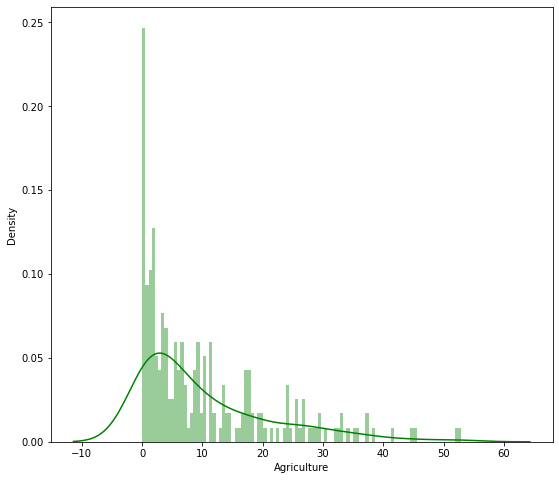

In [85]:

#plots
print(df_2010['Agriculture'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_2010['Agriculture'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    222.000000
mean      24.824775
std       14.970824
min        0.000000
25%       16.225000
50%       23.400000
75%       30.575000
max       77.500000
Name: Industry, dtype: float64


C:\Users\luisl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


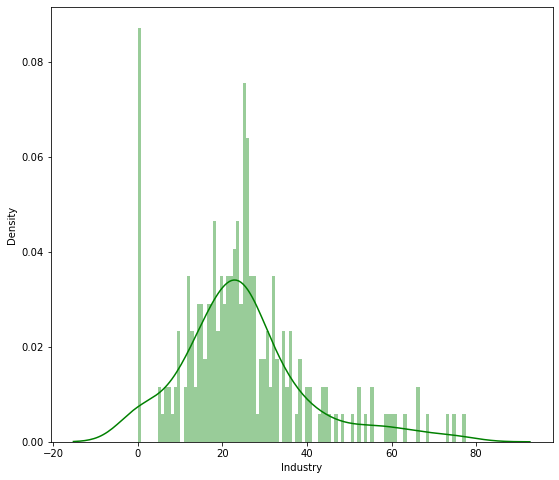

In [86]:

#plots
print(df_2010['Industry'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_2010['Industry'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    222.000000
mean      10.566216
std        7.410582
min        0.000000
25%        5.150000
50%       10.550000
75%       14.850000
max       47.300000
Name: Manufacturing, dtype: float64


C:\Users\luisl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


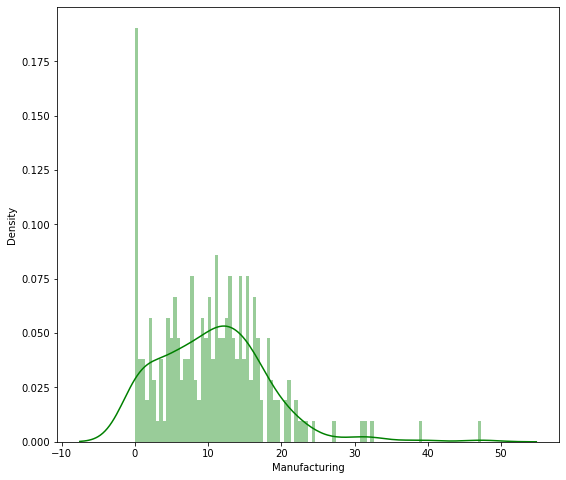

In [87]:

#plots
print(df_2010['Manufacturing'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_2010['Manufacturing'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    222.000000
mean      50.720270
std       19.990629
min        0.000000
25%       43.525000
50%       53.300000
75%       63.050000
max       94.000000
Name: Services, dtype: float64


C:\Users\luisl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


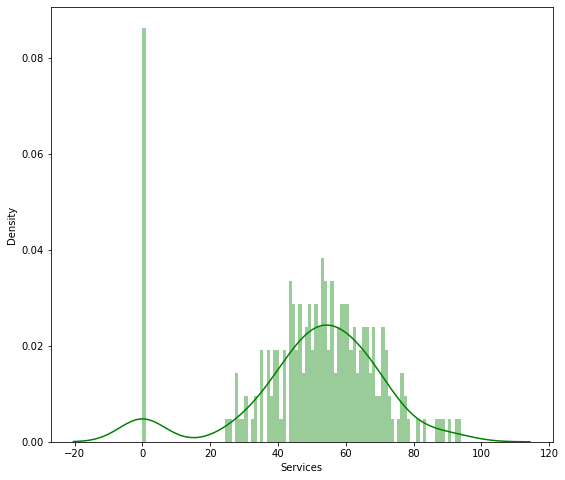

In [88]:

#plots
print(df_2010['Services'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_2010['Services'], color='g', bins=100, hist_kws={'alpha': 0.4});

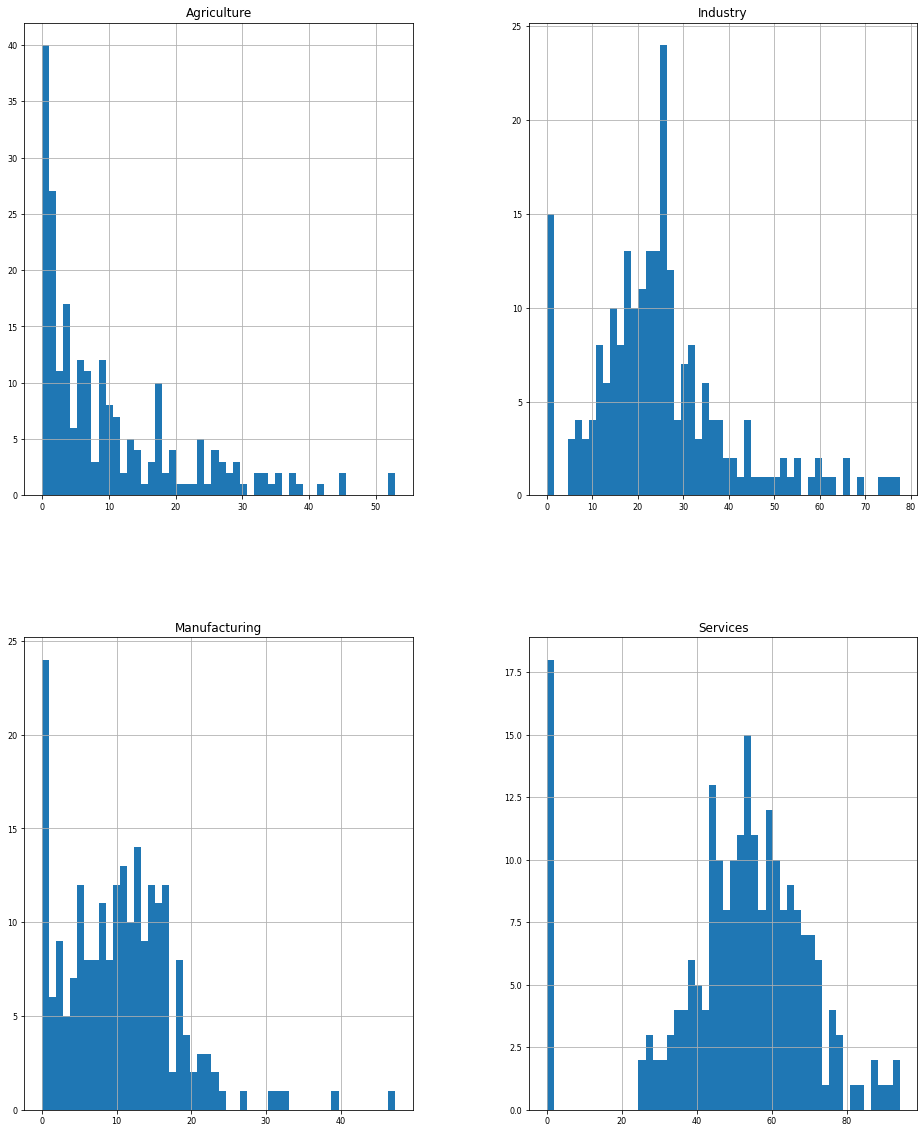

In [89]:
#plot de todos a la vez

df_2010.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [90]:


#localizar filas con 0
rowss=df_2010.index.values.tolist()#lista de filas
cols= df_2010.columns#lsita de columnas
eliminar_com_0=[]
for row in rowss:
    for col in cols:
        if df_2010[col][row]==0:
            eliminar_com_0.append(row)
            

        
        
        

In [91]:
eliminar_com_0


['American Samoa',
 'American Samoa',
 'American Samoa',
 'Andorra',
 'Andorra',
 'Andorra',
 'Andorra',
 'Barbados',
 'Barbados',
 'Barbados',
 'Barbados',
 'Bulgaria',
 'Channel Islands',
 'Channel Islands',
 'Channel Islands',
 'Channel Islands',
 'Macao SAR, China',
 'Comoros',
 'Djibouti',
 'Djibouti',
 'Djibouti',
 'Djibouti',
 'Eritrea',
 'French Polynesia',
 'French Polynesia',
 'French Polynesia',
 'French Polynesia',
 'Guam',
 'Guam',
 'Guam',
 'Guam',
 "Korea, Dem. People's Rep.",
 "Korea, Dem. People's Rep.",
 "Korea, Dem. People's Rep.",
 "Korea, Dem. People's Rep.",
 'Libya',
 'Liechtenstein',
 'Liechtenstein',
 'Liechtenstein',
 'Liechtenstein',
 'Monaco',
 'Monaco',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'San Marino',
 'San Marino',
 'San Marino',
 'San Marino',
 'Singapore',
 'Solomon Islands',
 'Solomon Islands',
 'Solomon Islands',
 'Solomon Islands',
 'Somalia',
 'Somalia',
 'Somalia',
 'S

In [92]:
#eliminar duplicados
from collections import OrderedDict
eliminar_com_0= list(OrderedDict.fromkeys(eliminar_com_0))

In [93]:
eliminar_com_0

['American Samoa',
 'Andorra',
 'Barbados',
 'Bulgaria',
 'Channel Islands',
 'Macao SAR, China',
 'Comoros',
 'Djibouti',
 'Eritrea',
 'French Polynesia',
 'Guam',
 "Korea, Dem. People's Rep.",
 'Libya',
 'Liechtenstein',
 'Monaco',
 'Northern Mariana Islands',
 'San Marino',
 'Singapore',
 'Solomon Islands',
 'Somalia',
 'St. Martin (French part)',
 'Syrian Arab Republic',
 'Turkmenistan',
 'Tuvalu',
 'Virgin Islands (U.S.)']

In [94]:
#eliminar las filas con 0
for i in eliminar_com_0:
    df_2010=df_2010.drop([i],axis=0)

In [98]:
df_2010

SECTOR,Agriculture,Industry,Manufacturing,Services
Afghanistan,26.2,21.2,12.5,48.9
Albania,18.0,24.9,5.5,44.0
Algeria,8.5,40.0,39.0,39.2
Angola,6.2,52.4,4.5,41.9
Antigua and Barbuda,1.6,16.2,2.2,70.7
...,...,...,...,...
Latin America & Caribbean,4.7,29.2,14.3,55.7
Middle East & North Africa,5.8,44.6,11.7,46.3
North America,1.1,20.0,11.7,75.2
South Asia,17.5,29.1,16.5,46.5


Index(['Agriculture', 'Industry', 'Manufacturing', 'Services'], dtype='object', name='SECTOR')